In [5]:
def dist(x:list,y:list)->float:
    pass
    d=0
    for i,j in zip(x,y):
        d+=abs(i-j)
    return d


In [6]:
def dist_mat_(points:list[tuple]):
    n=len(points)
    dist_mat=[ [None]*n for _ in points ]

    for i in range(n):
        for j in range(n):
            dist_mat[i][j] = dist(points[i],points[j])

    return dist_mat

In [7]:
datapoints = [
    (1,1), (1,2), (5,7), 
    (3,1), (3,3), (6,6), 
    (18,4),(18,3),(7,6), 
    (4,3), (4,7), (2,2), 
    (8,6), (8,7), (9,6)
]

In [31]:
def DBscan_scratch(points: list[tuple], eps: float = 2.0, minpt: int = 3, return_labels: bool = False) -> tuple:
    dm = dist_mat_(points)
    labels = ['P' + str(i) for i in range(1, len(points) + 1)]

    table = {}
    l = len(dm)
    core = []
    core_points = []

    for i in range(l):
        table[labels[i]] = [[], 1, -1]  # [neighbors, count, status]
        for j in range(l):
            if i != j and dm[i][j] <= eps:
                table[labels[i]][0].append(labels[j])  # Append neighbors
                table[labels[i]][1] += 1  # Increment neighbor count
        
        if table[labels[i]][1] >= minpt:
            core.append(labels[i])
            core_points.append(points[i])
            table[labels[i]][2] = 1  
    border = []
    border_points = []
    outlier = []
    outlier_points = []

    for k, v in table.items():
        if v[2] != 1: 
            is_border = False
            for neighbor in v[0]:  
                if neighbor in core:
                    table[k][2] = 0  # Mark as border point
                    border.append(k)
                    border_points.append(points[labels.index(k)])
                    is_border = True
                    break
            if not is_border:
                outlier.append(k)
                outlier_points.append(points[labels.index(k)])

    if return_labels:
        return core, border, outlier

    return core_points, border_points, outlier_points

c,b,o=DBscan_scratch(datapoints)
# ta=DBscan_scratch(datapoints)

In [32]:
c,b,o

([(1, 1),
  (1, 2),
  (5, 7),
  (3, 1),
  (3, 3),
  (6, 6),
  (7, 6),
  (2, 2),
  (8, 6),
  (8, 7),
  (9, 6)],
 [(4, 3), (4, 7)],
 [(18, 4), (18, 3)])

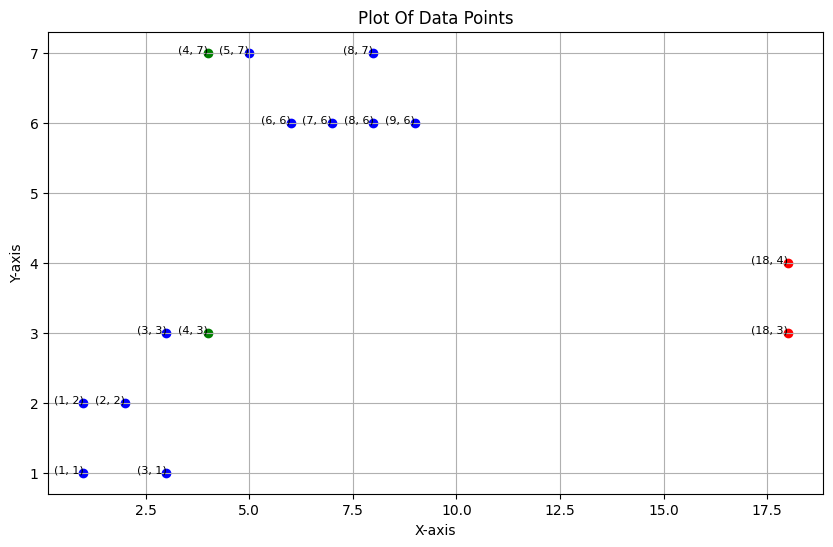

In [33]:
import matplotlib.pyplot as plt

# labels = ['p'+str(i) for i in range(1,len(datapoints))]

x = [point[0] for point in c]
y = [point[1] for point in c]

x_ = [point[0] for point in b]
y_ = [point[1] for point in b]

x__ = [point[0] for point in o]
y__ = [point[1] for point in o]

plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='blue')

plt.scatter(x_, y_, color='green')

plt.scatter(x__, y__, color='red')


for (x_val, y_val),label in zip(c,c):
    plt.text(x_val, y_val, label,fontsize=8, ha='right')
for (x_val, y_val),label in zip(b,b):
    plt.text(x_val, y_val, label,fontsize=8, ha='right')
for (x_val, y_val),label in zip(o,o):
    plt.text(x_val, y_val, label,fontsize=8, ha='right')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of data points'.title())

plt.grid(True)
plt.show()

DBSCAN using Library (iris data)

In [11]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [34]:
# iris = pd.DataFrame( load_iris().data,columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
data = load_iris().data 



In [35]:
dbscan = DBSCAN(eps=2,min_samples=3)
dbscan.fit(data)

DBSCAN(eps=2, min_samples=3)

In [43]:
labels = dbscan.labels_
data_df = pd.DataFrame(data, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
data_df['cluster'] = labels

data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [44]:
core_indices = dbscan.core_sample_indices_
core_points = data[core_indices]
outlier_points = data[labels == -1]
border_points = data[(labels != -1) & (labels != dbscan.labels_[core_indices])]


In [45]:
print(core_points)
print(border_points)
print(outlier_points)

print(len(core_points))
print(len(border_points))
print(len(outlier_points))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

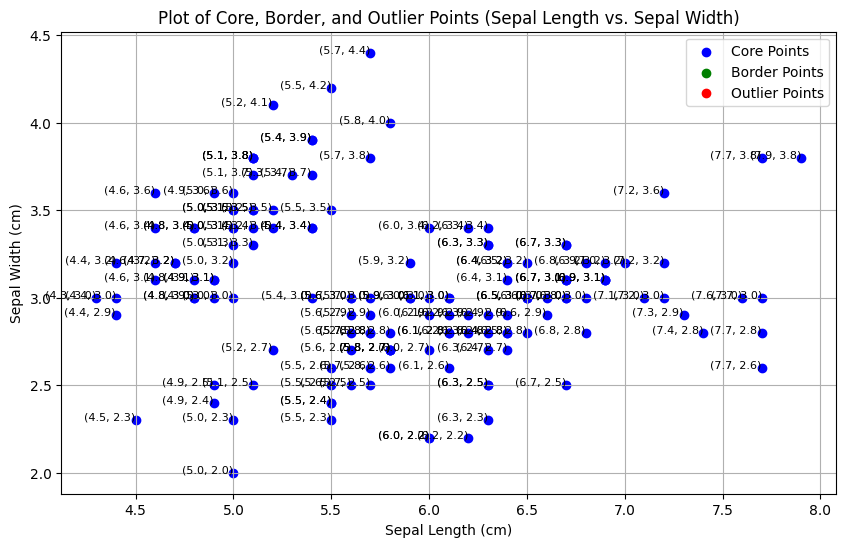

In [51]:
import matplotlib.pyplot as plt


x_core = [point[0] for point in core_points] 
y_core = [point[1] for point in core_points]  

x_border = [point[0] for point in border_points]
y_border = [point[1] for point in border_points]

x_outlier = [point[0] for point in outlier_points]
y_outlier = [point[1] for point in outlier_points]

plt.figure(figsize=(10, 6))
plt.scatter(x_core, y_core, color='blue', label='Core Points')
plt.scatter(x_border, y_border, color='green', label='Border Points')
plt.scatter(x_outlier, y_outlier, color='red', label='Outlier Points')

for (x_val, y_val) in zip(x_core, y_core):
    plt.text(x_val, y_val, f"({round(x_val, 2)}, {round(y_val, 2)})", fontsize=8, ha='right')

for (x_val, y_val) in zip(x_border, y_border):
    plt.text(x_val, y_val, f"({round(x_val, 2)}, {round(y_val, 2)})", fontsize=8, ha='right')

for (x_val, y_val) in zip(x_outlier, y_outlier):
    plt.text(x_val, y_val, f"({round(x_val, 2)}, {round(y_val, 2)})", fontsize=8, ha='right')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Plot of Core, Border, and Outlier Points (Sepal Length vs. Sepal Width)')

plt.grid(True)
plt.legend()

# Show the plot
plt.show()
